### AutoEncode 노이즈 제거
---
- 데이터에 노이즈 제거 활용
- 데이터에서 주요 특징만 추출 압축하기 때문에 노이즈는 주요 특징에서 제거
- 압축된 주요 특징으로 데이터 복원 => 노이즈 제거

In [133]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Sequential
from tensorflow import random
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

[1] 데이터 준비 및 로딩

In [92]:
(x_train, y_train), (x_test, y_test) = load_data()

[2] 데이터 전처리

In [93]:
# 이미지 데이터의 픽셀값 즉 특성 0.0 ~ 1.0으로 스케일링
x_train_scaled = x_train.reshape(-1, 28*28)/255.
x_test_scaled = x_test.reshape(-1, 28*28)/255.

In [94]:
x_train_scaled.shape, y_train.shape

((60000, 784), (60000,))

In [95]:
# 데이터셋에 노이즈 추가
# np.random.normal(평균loc=0.0, 표준편차scale=1.0, 출력size=None)
x_train_noised = x_train_scaled + np.random.normal(0, 0.5, size=x_train_scaled.shape)
x_test_noised = x_test_scaled + np.random.normal(0, 0.5, size=x_test_scaled.shape)

# np.clip(array, min, max) => 픽셀 연산으로 범위 벗어날 수 있어서 최소 0, 최대 1 체크
x_train_noised = np.clip(x_train_noised, a_min=0, a_max=1)
x_test_noised = np.clip(x_test_noised, a_min=0, a_max=1)

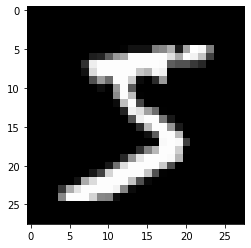

In [96]:
plt.imshow(x_train_scaled[0].reshape(28, 28), cmap='gray')
plt.show()

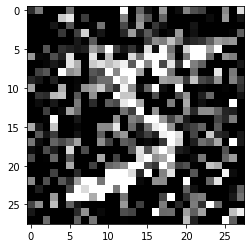

In [97]:
plt.imshow(x_train_noised[0].reshape(28, 28), cmap='gray')
plt.show()

[3] 모델 생성

In [98]:
random.set_seed(42)

In [120]:
def make_model(node):
    model = Sequential()
    # 입력
    model.add(Dense(node, activation='relu', input_shape=(784,)))
    # 출력
    model.add(Dense(784, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [121]:
oneModel = make_model(10)
fiveModel = make_model(100)
tenFiveModel = make_model(1000)

In [122]:
oneModel.fit(x_train_noised, x_train_scaled, epochs=1)

1875/1875 [==============================] - 2s 775us/step - loss: 0.0532


In [123]:
fiveModel.fit(x_train_noised, x_train_scaled, epochs=1)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0322


In [124]:
tenFiveModel.fit(x_train_noised, x_train_scaled, epochs=1)

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0216


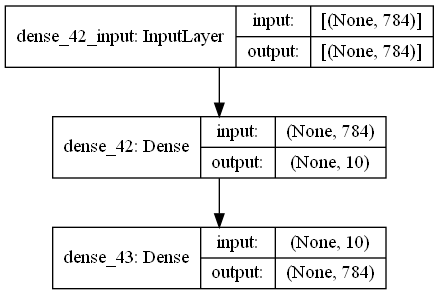

In [141]:
plot_model(oneModel, show_shapes=True)

In [142]:
pre_out = oneModel.predict(x_test_noised[127].reshape(-1, 784))
pre_out2 = fiveModel.predict(x_test_noised[127].reshape(-1, 784))
pre_out3 = tenFiveModel.predict(x_test_noised[127].reshape(-1, 784))

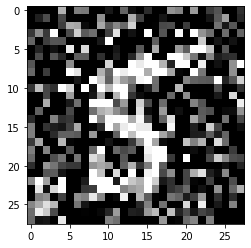

In [126]:
plt.imshow(x_test_noised[127].reshape(28, 28), cmap='gray')
plt.show()

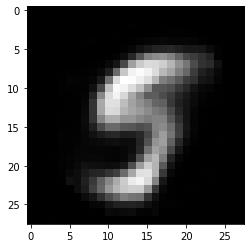

In [127]:
plt.imshow(pre_out.reshape(28,28), cmap='gray')
plt.show()

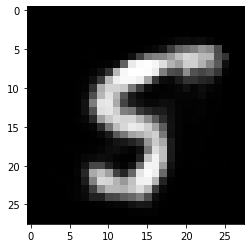

In [128]:
plt.imshow(pre_out2.reshape(28,28), cmap='gray')
plt.show()

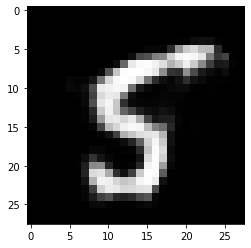

In [129]:
plt.imshow(pre_out3.reshape(28,28), cmap='gray')
plt.show()

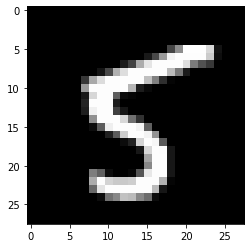

In [131]:
plt.imshow(x_test_scaled[127].reshape(28,28), cmap='gray')
plt.show()

- CNN 이용

In [207]:
def make_model2(node):
    model = Sequential()
    # 입력
    model.add(Conv2D(node, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1))) # 3차원     
    # 출력
    model.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    
    return model

In [215]:
oneModel2 = make_model2(10)
fiveModel2 = make_model2(100)
tenFiveModel2 = make_model2(1000)

In [209]:
oneModel2.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 10)        100       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 1)         91        
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


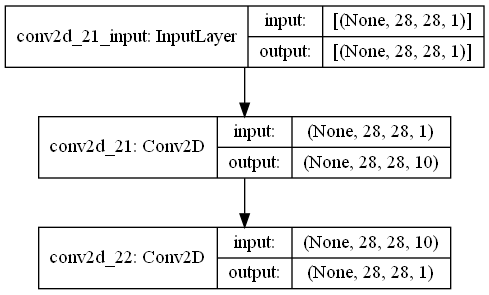

In [210]:
plot_model(oneModel2, show_shapes=True)

In [211]:
x_train_noised.shape, x_train_scaled.shape

((60000, 28, 28, 1), (60000, 28, 28, 1))

In [212]:
x_train_noised = x_train_noised.reshape(-1, 28, 28, 1)
x_train_scaled = x_train_scaled.reshape(-1, 28, 28, 1)

In [213]:
x_train_noised.shape

(60000, 28, 28, 1)

In [216]:
oneModel2.fit(x_train_noised, x_train_scaled, epochs=1)

1875/1875 [==============================] - 19s 10ms/step - loss: 0.1655


In [237]:
fiveModel2.fit(x_train_noised, x_train_scaled, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.1089
Epoch 2/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.1082
Epoch 3/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.1078
Epoch 4/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.1076
Epoch 5/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1075 0s - loss: 0
Epoch 6/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1073
Epoch 7/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.1072
Epoch 8/10
1875/1875 [==============================] - 91s 48ms/step - loss: 0.1072
Epoch 9/10
  79/1875 [>.............................] - ETA: 1:29 - loss: 0.1075

In [231]:
x_train_noised.shape

(60000, 28, 28, 1)

In [233]:
pre_out = oneModel2.predict(x_test_noised[5].reshape(-1, 28, 28, 1))
pre_out2 = fiveModel2.predict(x_test_noised[5].reshape(-1, 28, 28, 1))

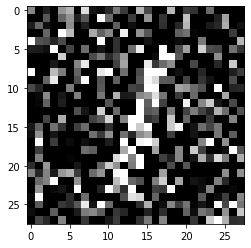

In [234]:
plt.imshow(x_test_noised[5].reshape(28, 28), cmap='gray')
plt.show()

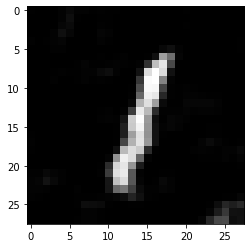

In [235]:
plt.imshow(pre_out.reshape(28,28), cmap='gray')
plt.show()

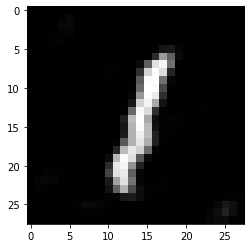

In [236]:
plt.imshow(pre_out2.reshape(28,28), cmap='gray')
plt.show()